In [1]:
import statsmodels.api as sm
from statsmodels.regression.rolling import RollingOLS
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import datetime as dt
import yfinance as yf
import pandas_ta 
import warnings
warnings.filterwarnings('ignore')

In [2]:
sp500 = yf.Ticker("^GSPC")

In [7]:
sp500 = yf.Ticker("^GSPC")             
sp500 = sp500.history(period="max")     
sp500

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,0.0,0.0
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,0.0,0.0
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,0.0,0.0
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0
...,...,...,...,...,...,...,...
2025-06-02 00:00:00-04:00,5896.680176,5937.399902,5861.430176,5935.939941,4832240000,0.0,0.0
2025-06-03 00:00:00-04:00,5938.560059,5981.350098,5929.000000,5970.370117,5026680000,0.0,0.0
2025-06-04 00:00:00-04:00,5978.939941,5990.479980,5966.109863,5970.810059,4767050000,0.0,0.0


In [8]:
sp500.index

DatetimeIndex(['1927-12-30 00:00:00-05:00', '1928-01-03 00:00:00-05:00',
               '1928-01-04 00:00:00-05:00', '1928-01-05 00:00:00-05:00',
               '1928-01-06 00:00:00-05:00', '1928-01-09 00:00:00-05:00',
               '1928-01-10 00:00:00-05:00', '1928-01-11 00:00:00-05:00',
               '1928-01-12 00:00:00-05:00', '1928-01-13 00:00:00-05:00',
               ...
               '2025-05-23 00:00:00-04:00', '2025-05-27 00:00:00-04:00',
               '2025-05-28 00:00:00-04:00', '2025-05-29 00:00:00-04:00',
               '2025-05-30 00:00:00-04:00', '2025-06-02 00:00:00-04:00',
               '2025-06-03 00:00:00-04:00', '2025-06-04 00:00:00-04:00',
               '2025-06-05 00:00:00-04:00', '2025-06-06 00:00:00-04:00'],
              dtype='datetime64[ns, America/New_York]', name='Date', length=24474, freq=None)

<Axes: xlabel='Date'>

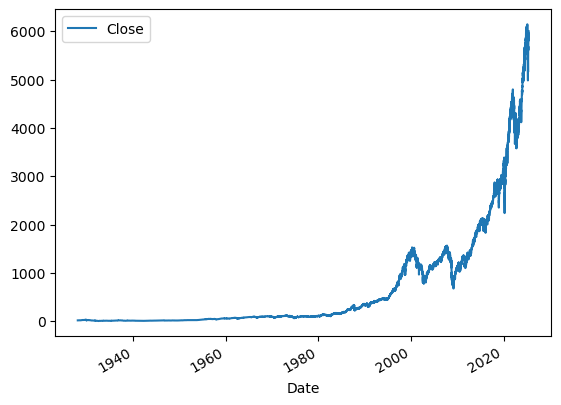

In [11]:
sp500.plot.line(y = "Close", use_index = True)

In [16]:

del sp500["Stock Splits"]

In [17]:
sp500["Tomorrow"] = sp500["Close"].shift(-1)
sp500

,Open,High,Low,Close,Volume,Tomorrow
Date,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.760000
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,17.719999
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,17.549999
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,17.660000
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.500000
...,...,...,...,...,...,...
2025-06-02 00:00:00-04:00,5896.680176,5937.399902,5861.430176,5935.939941,4832240000,5970.370117
2025-06-03 00:00:00-04:00,5938.560059,5981.350098,5929.000000,5970.370117,5026680000,5970.810059
2025-06-04 00:00:00-04:00,5978.939941,5990.479980,5966.109863,5970.810059,4767050000,5939.299805


In [23]:
sp500["Target"] = (sp500["Tomorrow"] > sp500["Close"]).astype(int)
sp500

,Open,High,Low,Close,Volume,Tomorrow,Target
Date,,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.760000,1
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,17.719999,0
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,17.549999,0
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,17.660000,1
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.500000,0
...,...,...,...,...,...,...,...
2025-06-02 00:00:00-04:00,5896.680176,5937.399902,5861.430176,5935.939941,4832240000,5970.370117,1
2025-06-03 00:00:00-04:00,5938.560059,5981.350098,5929.000000,5970.370117,5026680000,5970.810059,1
2025-06-04 00:00:00-04:00,5978.939941,5990.479980,5966.109863,5970.810059,4767050000,5939.299805,0


In [24]:
sp500 = sp500.loc["1990-01-01":].copy()
sp500

,Open,High,Low,Close,Volume,Tomorrow,Target
Date,,,,,,,
1990-01-02 00:00:00-05:00,353.399994,359.690002,351.980011,359.690002,162070000,358.760010,0
1990-01-03 00:00:00-05:00,359.690002,360.589996,357.890015,358.760010,192330000,355.670013,0
1990-01-04 00:00:00-05:00,358.760010,358.760010,352.890015,355.670013,177000000,352.200012,0
1990-01-05 00:00:00-05:00,355.670013,355.670013,351.350006,352.200012,158530000,353.790009,1
1990-01-08 00:00:00-05:00,352.200012,354.239990,350.540009,353.790009,140110000,349.619995,0
...,...,...,...,...,...,...,...
2025-06-02 00:00:00-04:00,5896.680176,5937.399902,5861.430176,5935.939941,4832240000,5970.370117,1
2025-06-03 00:00:00-04:00,5938.560059,5981.350098,5929.000000,5970.370117,5026680000,5970.810059,1
2025-06-04 00:00:00-04:00,5978.939941,5990.479980,5966.109863,5970.810059,4767050000,5939.299805,0


In [27]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators = 100, min_samples_split = 100, random_state = 1)

In [30]:
train = sp500 .iloc[:-100] 
test = sp500.iloc[-100:]
predictors = ["Close", "Volume","Open","High","Low"]
model.fit(train[predictors],train["Target"])

RandomForestClassifier(min_samples_split=100, random_state=1)

In [33]:
from sklearn.metrics import precision_score

preds = model.predict(test[predictors])
preds = pd.Series(preds, index = test.index)

In [35]:
precision_score(test["Target"],preds)

0.6

<Axes: xlabel='Date'>

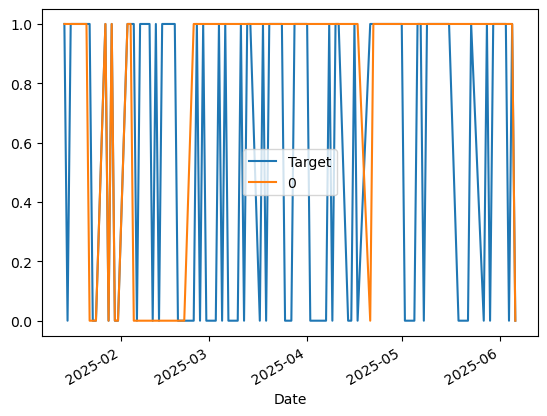

In [36]:
combined = pd.concat([test["Target"], preds], axis = 1)
combined.plot()

In [41]:
def predict(train, test, predictors, model):
    model.fit(train[predictors], train["Target"])
    preds = model.predict(test[predictors])
    preds = pd.Series(preds, index=test.index, name="Predictions")  
    combined = pd.concat([test["Target"], preds], axis=1)  
    return combined

In [42]:
def backtest(data, model, predictors, start=2500, step=250):
    all_predictions = []

    for i in range(start, data.shape[0], step):
        train = data.iloc[0:i].copy()
        test = data.iloc[i:i+step].copy()
        predictions = predict(train, test, predictors, model)
        all_predictions.append(predictions)

    return pd.concat(all_predictions)

In [45]:
predictions = backtest(sp500, model, predictors)

In [46]:
predictions["Predictions"].value_counts()


Predictions
0    3759
1    2665
Name: count, dtype: int64

In [50]:
 precision_score(predictions["Target"], predictions["Predictions"])

0.5298311444652908

In [48]:
predictions["Predictions"].value_counts() / predictions.shape[0]

Predictions
0    0.585149
1    0.414851
Name: count, dtype: float64

In [60]:
horizons = [2, 5, 60, 250, 1000]
new_predictors = []

for horizon in horizons:
    rolling_averages = sp500.rolling(horizon).mean()
    
    ratio_column = f"Close_Ratio_{horizon}"
    sp500[ratio_column] = sp500["Close"] / rolling_averages["Close"]
    
    trend_column = f"Trend_{horizon}"
    sp500[trend_column] = sp500["Target"].shift(1).rolling(horizon).sum()
    
    new_predictors += [ratio_column, trend_column]


In [61]:
sp500 = sp500.dropna()

In [62]:
model = RandomForestClassifier(n_estimators = 200, min_samples_split = 50, random_state = 1)

In [1]:
def predict(train, test, predictors, model):
    model.fit(train[predictors], train["Target"])
    preds = model.predict_proba(test[predictors])[:, 1]  
    preds[preds >= 0.6] = 1
    preds[preds < 0.6] = 0
    return pd.Series(preds, index=test.index, name="Predictions")


In [66]:
predictions = backtest(sp500, model, new_predictors)


In [73]:
predictions.value_counts()

Predictions
0.0    4553
1.0     870
Name: count, dtype: int64